In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("data/train.csv")
df.head()


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


In [5]:
df.shape


(911, 12)

In [7]:
df.isnull().sum()


ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


In [11]:
df.describe()


,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,528.327113,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,305.072794,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,266.000000,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,531.000000,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,795.500000,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,1049.000000,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [13]:
df.columns


Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category', 'food_waste_kg'],
      dtype='object')

In [17]:
df.columns[-5:]


Index(['special_event', 'past_waste_kg', 'staff_experience', 'waste_category',
       'food_waste_kg'],
      dtype='object')

In [19]:
df['food_waste_kg'].head()


0    28.946465
1    51.549053
2    53.008323
3    48.621527
4    44.156984
Name: food_waste_kg, dtype: float64

In [21]:
df['food_waste_kg'].describe()


count    911.000000
mean      44.842691
std       27.934366
min       10.819048
25%       32.887912
50%       41.146930
75%       50.046681
max      274.328783
Name: food_waste_kg, dtype: float64

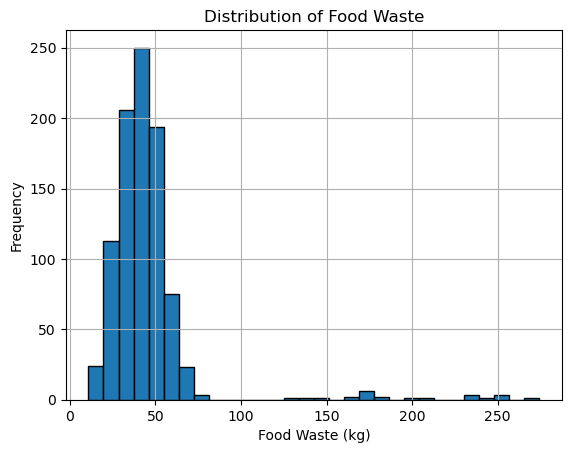

In [23]:
import matplotlib.pyplot as plt

df['food_waste_kg'].hist(bins=30, edgecolor='black')
plt.xlabel("Food Waste (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Food Waste")
plt.show()


In [25]:
df.select_dtypes(include='object').columns


Index(['date', 'staff_experience', 'waste_category'], dtype='object')

In [27]:
df.select_dtypes(include=np.number).columns


Index(['ID', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'food_waste_kg'],
      dtype='object')

In [29]:
df[df.select_dtypes(include='object').columns].isnull().sum()


date                  0
staff_experience    164
waste_category        0
dtype: int64

In [31]:
df[df.select_dtypes(include=np.number).columns].isnull().sum()


ID                  0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
food_waste_kg       0
dtype: int64

In [33]:
df.duplicated().sum()


0

<Axes: >

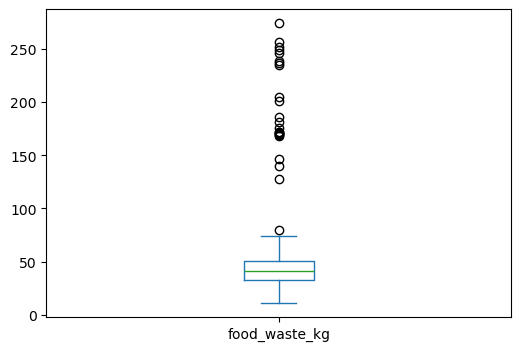

In [35]:
df['food_waste_kg'].plot.box(figsize=(6,4))


ID                     Axes(0.125,0.653529;0.168478x0.226471)
meals_served        Axes(0.327174,0.653529;0.168478x0.226471)
kitchen_staff       Axes(0.529348,0.653529;0.168478x0.226471)
temperature_C       Axes(0.731522,0.653529;0.168478x0.226471)
humidity_percent       Axes(0.125,0.381765;0.168478x0.226471)
day_of_week         Axes(0.327174,0.381765;0.168478x0.226471)
special_event       Axes(0.529348,0.381765;0.168478x0.226471)
past_waste_kg       Axes(0.731522,0.381765;0.168478x0.226471)
food_waste_kg              Axes(0.125,0.11;0.168478x0.226471)
dtype: object

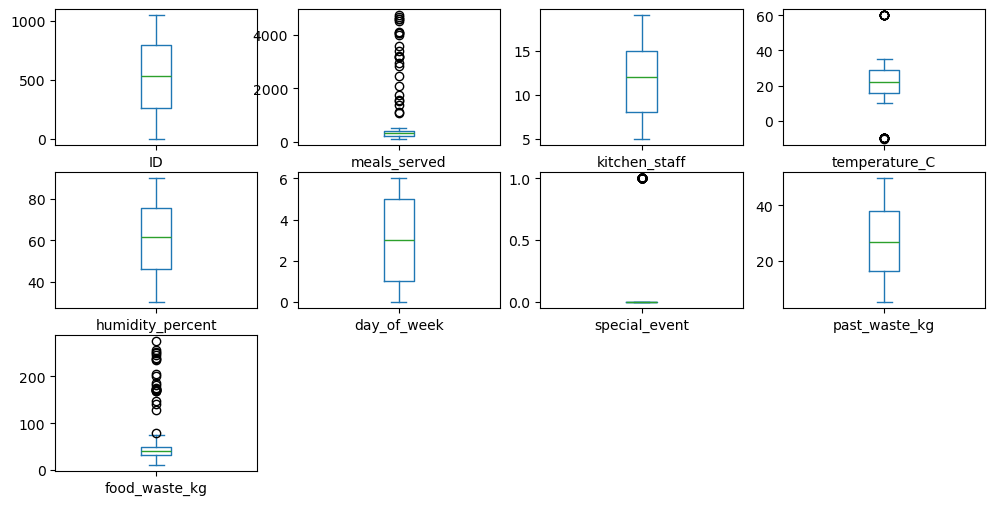

In [37]:
df[df.select_dtypes(include=np.number).columns].plot(kind='box', figsize=(12,6), subplots=True, layout=(3,4), sharex=False, sharey=False)


In [39]:
df.corr(numeric_only=True)['food_waste_kg'].sort_values(ascending=False)


food_waste_kg       1.000000
meals_served        0.852128
past_waste_kg       0.260767
special_event       0.118757
day_of_week         0.008090
kitchen_staff       0.007192
temperature_C      -0.015911
ID                 -0.020233
humidity_percent   -0.021793
Name: food_waste_kg, dtype: float64

In [41]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


date: 867 unique values
staff_experience: 4 unique values
waste_category: 5 unique values


In [47]:
df.select_dtypes(include='object').columns.tolist()


['date', 'staff_experience', 'waste_category']

In [49]:
df['date'].unique()


array(['2022-12-19', '2023-11-21', '2022-02-01', '2023-03-19',
       '2022-07-18', '2023-03-02', '2022-04-18', '2023-12-16',
       '2023-07-07', '2023-11-07', '2022-06-08', '2023-04-21',
       '2022-01-25', '2023-09-10', '2023-04-29', '2024-06-03',
       '2023-10-13', '2022-09-02', '2024-04-27', '2024-09-09',
       '2024-04-08', '2023-07-25', '2022-03-01', '2022-10-18',
       '2022-03-12', '2022-12-11', '2022-07-04', '2022-05-22',
       '2023-01-26', '2023-05-07', '2024-04-06', '2022-04-12',
       '2024-01-20', '2023-07-06', '2022-11-03', '2024-09-13',
       '2022-11-18', '2024-03-10', '2024-01-01', '2023-11-09',
       '2023-10-16', '2022-03-18', '2022-07-12', '2022-03-28',
       '2023-04-04', '2022-02-18', '2024-07-07', '2022-01-04',
       '2022-11-06', '2024-01-14', '2024-05-23', '2023-02-03',
       '2023-09-09', '2022-02-19', '2022-07-19', '2023-08-22',
       '2024-08-27', '2024-06-01', '2023-05-13', '2023-08-27',
       '2022-01-11', '2024-06-07', '2023-11-02', '2024-

In [51]:
df['staff_experience'].unique()


array(['intermediate', nan, 'Beginner', 'Intermediate', 'EXPERT'],
      dtype=object)

In [53]:
df['waste_category'].unique()


array(['dairy', 'MeAt', 'MEAT', 'Vegetables', 'GRAINS'], dtype=object)

In [55]:
df['waste_category'].value_counts()


waste_category
MEAT          210
dairy         180
Vegetables    176
GRAINS        176
MeAt          169
Name: count, dtype: int64

In [57]:
df['staff_experience'].value_counts()


staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64

In [59]:
df['date'].isnull().sum()


0

In [61]:
df['date'].head(10)


0    2022-12-19
1    2023-11-21
2    2022-02-01
3    2023-03-19
4    2022-07-18
5    2023-03-02
6    2022-04-18
7    2023-12-16
8    2023-07-07
9    2023-11-07
Name: date, dtype: object

In [63]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].head()


0   2022-12-19
1   2023-11-21
2   2022-02-01
3   2023-03-19
4   2022-07-18
Name: date, dtype: datetime64[ns]

In [65]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

df[['date', 'year', 'month', 'dayofweek']].head()


,date,year,month,dayofweek
0,2022-12-19,2022,12,0
1,2023-11-21,2023,11,1
2,2022-02-01,2022,2,1
3,2023-03-19,2023,3,6
4,2022-07-18,2022,7,0


In [67]:
df['date'].isnull().sum()


0

In [69]:
df['date_missing'] = df['date'].isna().astype(int)
df['date_missing'].value_counts()


date_missing
0    911
Name: count, dtype: int64

In [71]:
df.isnull().sum()


ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
year                  0
month                 0
dayofweek             0
date_missing          0
dtype: int64

In [73]:
X = df.drop(columns=['food_waste_kg'])
y = df['food_waste_kg']

X.shape, y.shape


((911, 15), (911,))

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_val.shape


((728, 15), (183, 15))

In [77]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
num_cols[:5], cat_cols


(['ID', 'meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent'],
 ['date', 'staff_experience', 'waste_category'])

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

baseline = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1))
])

baseline.fit(X_train, y_train)
val_pred = baseline.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, val_pred))
mae  = mean_absolute_error(y_val, val_pred)
rmse, mae


(6.9200870843974664, 4.671656090599291)

In [83]:
from xgboost import XGBRegressor

xgb_model = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train, y_train)
val_pred = xgb_model.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val, val_pred))
mae_xgb  = mean_absolute_error(y_val, val_pred)
rmse_xgb, mae_xgb


(7.418586110251964, 4.586430594745047)

In [85]:
print("Random Forest  -> RMSE:", rmse, " MAE:", mae)
print("XGBoost        -> RMSE:", rmse_xgb, " MAE:", mae_xgb)


Random Forest  -> RMSE: 6.9200870843974664  MAE: 4.671656090599291
XGBoost        -> RMSE: 7.418586110251964  MAE: 4.586430594745047


In [87]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse = cross_val_score(
    xgb_model, X, y,
    scoring=make_scorer(rmse_scorer, greater_is_better=False),
    cv=cv, n_jobs=-1
)

cv_rmse = -neg_rmse
cv_rmse.mean(), cv_rmse.std()


(10.04260914508657, 2.4184805935212847)

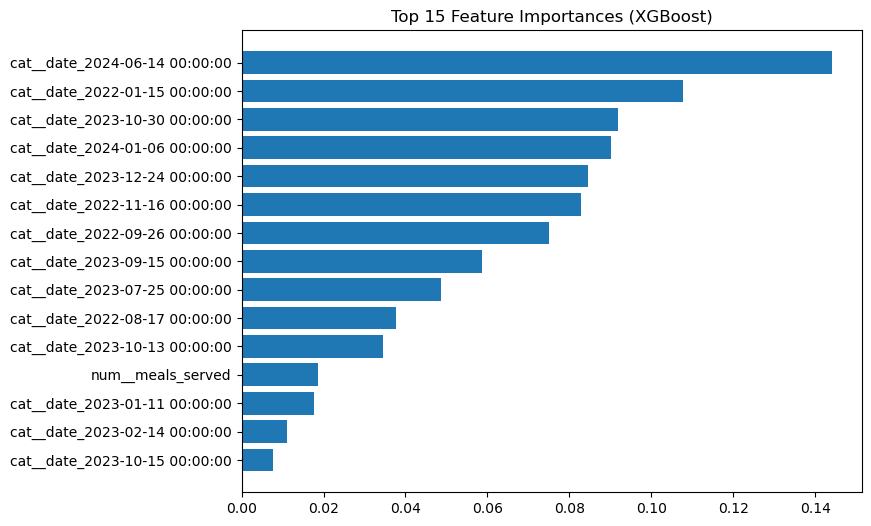

In [89]:
import matplotlib.pyplot as plt

# Fit once more on the whole training set
xgb_model.fit(X_train, y_train)

# Get feature names from preprocessing
feature_names = xgb_model.named_steps['prep'].get_feature_names_out()

# Extract importance scores from the trained XGBRegressor
importances = xgb_model.named_steps['xgb'].feature_importances_

# Sort and plot top 15
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()


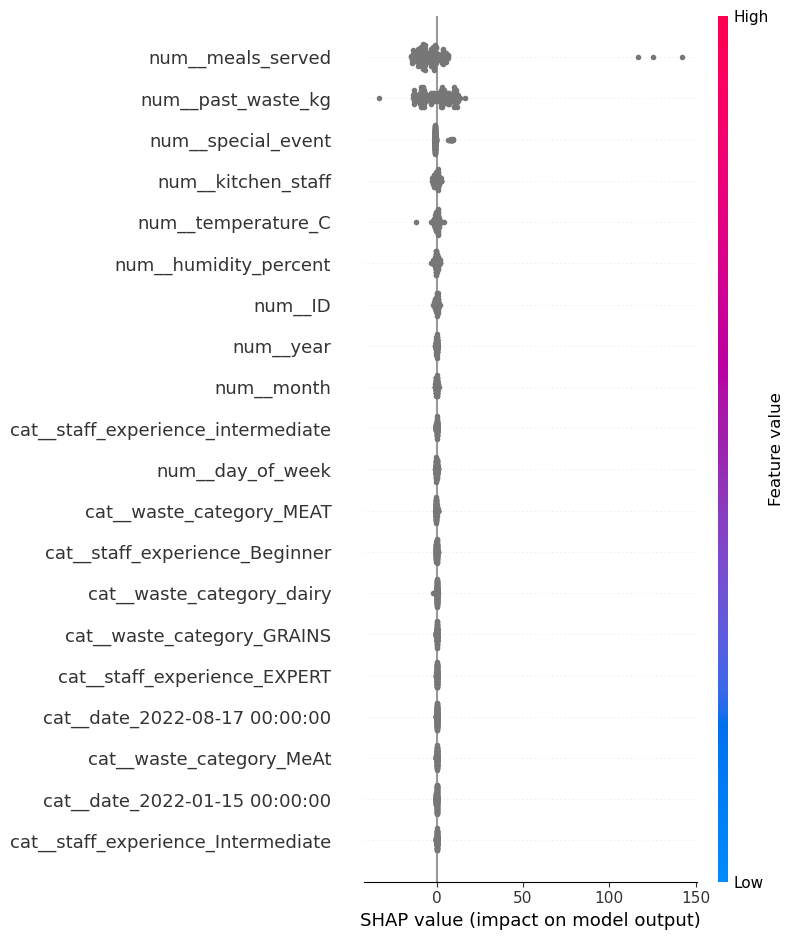

In [91]:
import shap

# Fit again just to be sure
xgb_model.fit(X_train, y_train)

# Get the XGBoost regressor directly
xgb_reg = xgb_model.named_steps['xgb']

# Use SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(
    xgb_model.named_steps['prep'].transform(X_val)
)

# Summary plot for top features
shap.summary_plot(shap_values, 
                  xgb_model.named_steps['prep'].transform(X_val),
                  feature_names=feature_names)


In [93]:
df['experience_month'] = df['staff_experience'].astype(str) + "_" + df['month'].astype(str)
df['experience_month'].value_counts().head()


experience_month
nan_1             24
intermediate_5    24
intermediate_1    23
Beginner_2        22
Intermediate_3    21
Name: count, dtype: int64

In [95]:
X = df.drop(columns=['food_waste_kg'])
y = df['food_waste_kg']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [97]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()
num_cols[:5], cat_cols[:10]


(['ID', 'meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent'],
 ['date', 'staff_experience', 'waste_category', 'experience_month'])

In [99]:
# Rebuild the preprocessing pipeline with updated cols
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# XGBoost model
from xgboost import XGBRegressor
xgb_model = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train, y_train)
val_pred = xgb_model.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val, val_pred))
mae_xgb  = mean_absolute_error(y_val, val_pred)
rmse_xgb, mae_xgb


(6.945373652667876, 4.58563083562601)

Skewness: 4.990900046269182


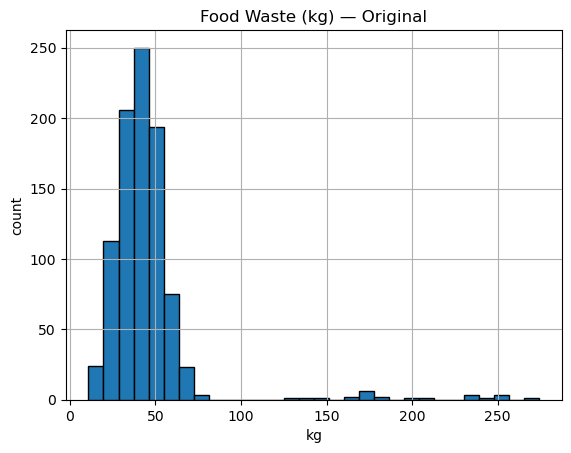

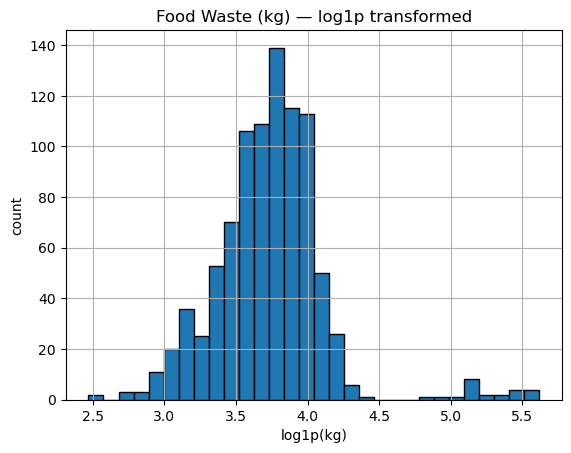

In [101]:
import numpy as np
import matplotlib.pyplot as plt

print("Skewness:", df['food_waste_kg'].skew())

plt.figure()
df['food_waste_kg'].hist(bins=30, edgecolor='black')
plt.title("Food Waste (kg) — Original")
plt.xlabel("kg"); plt.ylabel("count")
plt.show()

plt.figure()
np.log1p(df['food_waste_kg']).hist(bins=30, edgecolor='black')
plt.title("Food Waste (kg) — log1p transformed")
plt.xlabel("log1p(kg)"); plt.ylabel("count")
plt.show()


In [103]:
# Apply log1p transform to target
y_log = np.log1p(y)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Train XGBoost on log-transformed target
xgb_model.fit(X_train, y_train)
val_pred_log = xgb_model.predict(X_val)

# Inverse transform predictions
val_pred = np.expm1(val_pred_log)

# Compare against original target (non-transformed)
y_val_orig = np.expm1(y_val)

rmse_log = np.sqrt(mean_squared_error(y_val_orig, val_pred))
mae_log  = mean_absolute_error(y_val_orig, val_pred)
rmse_log, mae_log


(8.788987358221178, 4.957330352392991)

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__n_estimators': [500, 1000]
}

grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Params: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 4, 'xgb__n_estimators': 500, 'xgb__subsample': 0.8}
Best RMSE: 0.14971835236370715


In [107]:
best_xgb = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.05,
        max_depth=4,
        n_estimators=500,
        subsample=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

best_xgb.fit(X_train, y_train)
val_pred_log = best_xgb.predict(X_val)
val_pred = np.expm1(val_pred_log)
y_val_orig = np.expm1(y_val)

rmse_best = np.sqrt(mean_squared_error(y_val_orig, val_pred))
mae_best  = mean_absolute_error(y_val_orig, val_pred)
rmse_best, mae_best


(8.420445029123687, 4.87882895639071)

In [109]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor([
    ('rf', baseline.named_steps['rf']),
    ('xgb', best_xgb.named_steps['xgb'])
])

# Fit with preprocessing
ensemble_model = Pipeline([
    ('prep', preprocessor),
    ('ensemble', ensemble)
])

ensemble_model.fit(X_train, y_train)
val_pred_log = ensemble_model.predict(X_val)
val_pred = np.expm1(val_pred_log)

rmse_ens = np.sqrt(mean_squared_error(y_val_orig, val_pred))
mae_ens  = mean_absolute_error(y_val_orig, val_pred)
rmse_ens, mae_ens


(7.172945066811339, 4.632318801984415)

In [111]:
import joblib

joblib.dump(ensemble_model, "final_food_waste_model.joblib")


['final_food_waste_model.joblib']

In [113]:
test_df = pd.read_csv("data/test.csv")
test_df.head()


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [115]:
test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['dayofweek'] = test_df['date'].dt.dayofweek
test_df['date_missing'] = test_df['date'].isna().astype(int)
test_df['experience_month'] = test_df['staff_experience'].astype(str) + "_" + test_df['month'].astype(str)

test_df.head()


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,year,month,dayofweek,date_missing,experience_month
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,2022,12,0,0,intermediate_12
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,2023,11,1,0,nan_11
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,2022,2,1,0,Beginner_2
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,2023,3,6,0,Beginner_3
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,2022,7,0,0,Intermediate_7


In [117]:
test_pred_log = ensemble_model.predict(test_df)
test_pred = np.expm1(test_pred_log)

test_pred[:10]


array([27.30970089, 50.36585692, 51.45521674, 47.50305044, 43.76128733,
       27.05597427, 50.68301974, 67.7333042 , 42.25308848, 35.25896853])

In [119]:
submission = pd.DataFrame({
    "Id": range(1, len(test_pred) + 1),
    "food_waste_kg": test_pred
})

submission.to_csv("food_waste_predictions.csv", index=False)
submission.head()


,Id,food_waste_kg
0,1,27.309701
1,2,50.365857
2,3,51.455217
3,4,47.503050
4,5,43.761287


In [121]:
import os
os.listdir()


['.ipynb_checkpoints',
 'data',
 'final_food_waste_model.joblib',
 'food_waste_predictions.csv',
 'messy_food_waste.ipynb']